# <center> Знакомство с данными и агрегация


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
import glob
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'..\data\yellow_tripdata_2016-05.csv')
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [4]:
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].astype('datetime64')
data['tpep_dropoff_datetime'] =  data['tpep_dropoff_datetime'].astype('datetime64')

In [5]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


# Очистим данные

## Поездки с  нулевой длительностью

In [6]:
data['trip_duration_min'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']) / \
                                        np.timedelta64(1, 'm')

In [7]:
old_len = len(data)

data.drop(data[data['trip_duration_min'] < 1].index, inplace=True, axis=0) 
                    

new_len = len(data)
print(f"Filtered - {old_len - new_len}")

Filtered - 97206


In [8]:
def round_min(minute):
    return round(minute, 2)

In [9]:
data['trip_duration_min'] = data['trip_duration_min'].apply(round_min)
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,17.52
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,7.52
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7.02
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,19.78
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,6.65


## Поездки с нулевым количеством пассажиров

In [10]:
old_len = len(data)

data.drop(data[data['passenger_count'] == 0].index, inplace=True)

new_len = len(data)
print(f"Filtered - {old_len - new_len}")

Filtered - 171


## Поездки с нулевым расстоянием поездки по счётчику

In [11]:
old_len = len(data)

data.drop(data[data['trip_distance'] < 0.1].index, inplace=True)


new_len = len(data)
print(f"Filtered - {old_len - new_len}")

Filtered - 20916


## Поездки с координатами начала, не попадающими в прямоугольник Нью-Йорка

In [12]:
region = pd.read_csv(r'..\regions.csv', sep=";", index_col=0)
region.head(5)

,west,east,south,north
region,,,,
1,-74.25559,-74.244478,40.496120,40.504508
2,-74.25559,-74.244478,40.504508,40.512896
3,-74.25559,-74.244478,40.512896,40.521285
4,-74.25559,-74.244478,40.521285,40.529673
5,-74.25559,-74.244478,40.529673,40.538061


In [13]:
ny_square = {"latitude" :[40.49612, 40.91553], "longitude":[-74.25559, -73.70001]}

In [14]:
def get_grid_params(grid_input:dict, grid_cells: int):
    d_latitude = (grid_input['latitude'][1] - grid_input['latitude'][0]) / grid_cells
    d_longitude = (grid_input['longitude'][1] - grid_input['longitude'][0]) / grid_cells

    return d_latitude, d_longitude

In [15]:
def get_region_5(row, d_latitude: float , d_longitude: float, ny_grid: float, grid_cells: int):

    # calc indexes assuming matrix longitude/latitude
    # coordinates tuple should fit an interval on the intersection
    # of latitude and longitude indexes
    # region is calculated as a function of two indexes
    # so that it fits provided 'regions.csv' table

    longitude_index = (row['pickup_longitude'] - ny_grid['longitude'][0]) // d_longitude
    latitude_index = (row['pickup_latitude'] - ny_grid['latitude'][0]) // d_latitude + 1
    region = longitude_index * grid_cells + latitude_index
    return int(region)

def get_region_individual(pickup_longitude: float, pickup_latitude: float,d_latitude: float , d_longitude: float, ny_grid: dict, grid_cells: int):

    # calc indexes assuming matrix longitude/latitude
    # coordinates tuple should fit an interval on the intersection
    # of latitude and longitude indexes
    # region is calculated as a function of two indexes
    # so that it fits provided 'regions.csv' table

    longitude_index = (pickup_longitude - ny_grid['longitude'][0]) // d_longitude
    latitude_index = (pickup_latitude - ny_grid['latitude'][0]) // d_latitude + 1
    region = longitude_index * grid_cells + latitude_index
    return int(region)

In [16]:
d_latitude, d_longitude = get_grid_params(grid_input = ny_square, grid_cells = 50)

In [17]:
data['region'] = data.apply(get_region_5, d_latitude = d_latitude , d_longitude = d_longitude , ny_grid = ny_square, grid_cells = 50,  axis=1)

data.drop(data[data['region'] > 2500].index, inplace=True)

In [18]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,region
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,17.52,1233
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,7.52,1180
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7.02,1180
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,19.78,1173
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,6.65,1130
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,...,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30,5.32,1231
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,...,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80,15.72,1234
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,...,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,6.52,1231
11,1,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,...,1,17.0,0.5,0.5,3.65,0.0,0.3,21.95,15.82,1384
12,2,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,...,1,16.0,0.5,0.5,3.46,0.0,0.3,20.76,13.45,1228


## Оставим часы и дату поездки

In [19]:
data['date_hour'] = [datetime(item.year, item.month, item.day, item.hour) 
                             for item in  data.tpep_pickup_datetime]

In [20]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,region,date_hour
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,15.0,0.5,0.5,1.50,0.0,0.3,17.80,17.52,1233,2016-05-01
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,7.5,0.5,0.5,0.88,0.0,0.3,9.68,7.52,1180,2016-05-01
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7.02,1180,2016-05-01
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,17.0,0.5,0.5,3.66,0.0,0.3,21.96,19.78,1173,2016-05-01
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,6.0,0.5,0.5,1.46,0.0,0.3,8.76,6.65,1130,2016-05-01


# Агрегируйте данные за май 2016 года по часам и областям

In [21]:
data_group = data.groupby(['date_hour', 'region']).size().reset_index(name='count')

In [22]:
data_group.to_csv('.\\data_aggregation/region_hour_count.csv')

FileNotFoundError: [Errno 2] No such file or directory: '.\\data_aggregation/region_hour_count.csv'

In [23]:
data_group.head(5)

,date_hour,region,count
0,2016-05-01,1015,1
1,2016-05-01,1017,1
2,2016-05-01,1029,2
3,2016-05-01,1033,4
4,2016-05-01,1068,1


# Построим график количества поездок жёлтого такси из ячейки, содержащей Empire State Building

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
ESB_latitude, ESB_longitude = [40.748817, -73.985428]

In [26]:
ESB_region = esb_region = get_region_individual(pickup_longitude = ESB_longitude, pickup_latitude = ESB_latitude ,d_latitude=d_latitude , d_longitude=d_longitude,
                                   ny_grid=ny_square , grid_cells = 50)
ESB_region

1231

In [27]:
ESB_data = data_group[data_group['region'] == ESB_region]
ESB_data

,date_hour,region,count
49,2016-05-01 00:00:00,1231,877
269,2016-05-01 01:00:00,1231,710
493,2016-05-01 02:00:00,1231,532
703,2016-05-01 03:00:00,1231,417
907,2016-05-01 04:00:00,1231,351
...,...,...,...
139469,2016-05-31 19:00:00,1231,1092
139638,2016-05-31 20:00:00,1231,995
139818,2016-05-31 21:00:00,1231,1095
139999,2016-05-31 22:00:00,1231,873


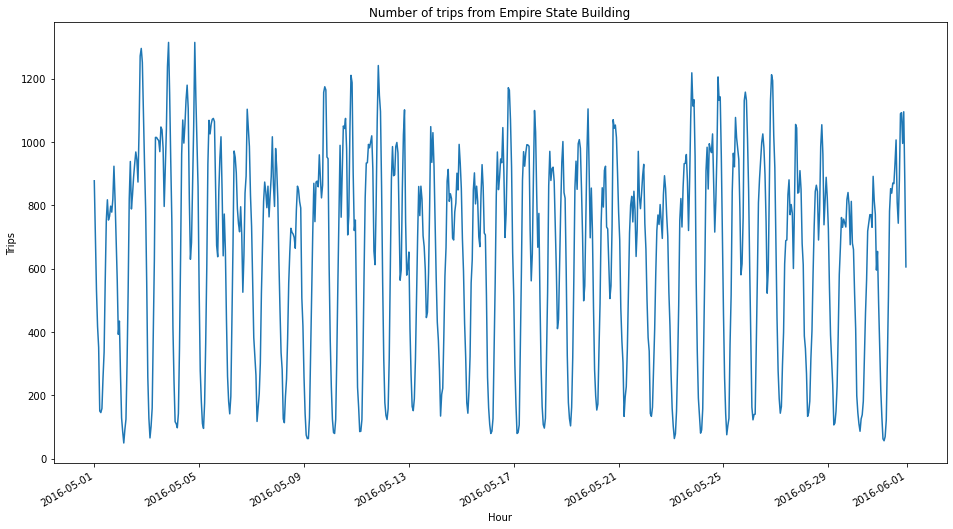

In [28]:
plt.figure(figsize=(16, 9))

x = ESB_data['date_hour'].values
y = ESB_data['count'].values

plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Hour')
plt.ylabel('Trips')
plt.title('Number of trips from Empire State Building')
plt.show()

# Сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки? 

In [29]:
region_list = data_group[data_group['count'] == 0]['region']

In [30]:
region_list

Series([], Name: region, dtype: int64)